<a href="https://colab.research.google.com/github/Mnikito/INTRO_ML/blob/main/HW2/4105_HW2_FULL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [5]:
# Load Dataset
diabetes = pd.DataFrame(pd.read_csv('diabetes.csv'))

y = diabetes.pop('Outcome')

X = diabetes.copy()

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [7]:
# Test Split 80 - 20
seed = 9

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=seed)

In [8]:
# Standarizing Dataset
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)

X_test_std = sc.fit_transform(X_test)

In [9]:
# Finding Right C
C = [10, 1, 0.1, 0.01, 0.001]

for c in C:
  clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
  clf.fit(X_train_std, y_train)
  print('C:', c)
  print('Training Accuracy: ', clf.score(X_train_std, y_train))
  print('Testing Accuracy: ', clf.score(X_test_std, y_test))
  print('')

C: 10
Training Accuracy:  0.7899022801302932
Testing Accuracy:  0.7532467532467533

C: 1
Training Accuracy:  0.7915309446254072
Testing Accuracy:  0.7597402597402597

C: 0.1
Training Accuracy:  0.7833876221498371
Testing Accuracy:  0.7532467532467533

C: 0.01
Training Accuracy:  0.7003257328990228
Testing Accuracy:  0.7207792207792207

C: 0.001
Training Accuracy:  0.6514657980456026
Testing Accuracy:  0.6493506493506493



In [10]:
# Confusion Matrix
model = LogisticRegression(penalty='l1', C=1, solver='liblinear', max_iter=100)
model.fit(X_train_std, y_train)

print('Training Accuracy: ', model.score(X_train_std, y_train))
print('Testing Accuracy: ', model.score(X_test_std, y_test))

predicted = model.predict(X_test_std)
matrix = confusion_matrix(y_test, predicted)
matrix

Training Accuracy:  0.7915309446254072
Testing Accuracy:  0.7597402597402597


array([[84, 16],
       [21, 33]])

In [11]:
# Accuracy Precision and Recall
print("Accuracy:",metrics.accuracy_score(y_test, predicted)) 
print("Precision:",metrics.precision_score(y_test, predicted)) 
print("Recall:",metrics.recall_score(y_test, predicted)) 

Accuracy: 0.7597402597402597
Precision: 0.673469387755102
Recall: 0.6111111111111112


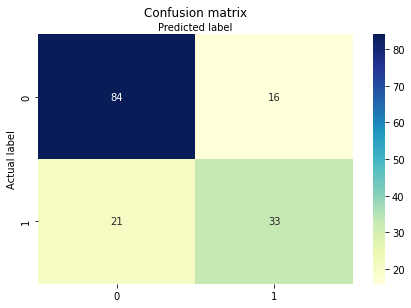

In [12]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 
plt.savefig("confusion_matrix.png", dpi = 360)

### Problem 2

In [23]:
# K FOLDS
K = 5
kfold = KFold(n_splits=K, shuffle=True)
model = LogisticRegression(penalty='l1', C=1, solver='liblinear', max_iter=100)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.303% (1.449%)


In [25]:
# K FOLDS
K = 10
kfold = KFold(n_splits=K, shuffle=True)
model = LogisticRegression(penalty='l1', C=1, solver='liblinear', max_iter=100)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 77.609% (2.988%)


### Problem 3

In [27]:
from sklearn.datasets import load_breast_cancer 

In [36]:
# Load Cancer Dataset and get ready for processing
breast = load_breast_cancer() 

breast_data = breast.data 

breast_labels = breast.target 
labels = np.reshape(breast_labels,(569,1)) 

final_breast_data = np.concatenate([breast_data,labels],axis=1) 
breast_dataset = pd.DataFrame(final_breast_data) 

features = breast.feature_names 
features_labels = np.append(features,'label') 


breast_dataset.columns = features_labels 

#breast_dataset['label'].replace(0, 'Benign',inplace=True) 
#breast_dataset['label'].replace(1, 'Malignant',inplace=True) 

breast_dataset.tail() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [37]:
# Preprocessing
y = breast_dataset.pop('label')

X = breast_dataset.copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=seed)

# Standarizing Dataset
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)

X_test_std = sc.fit_transform(X_test)


# Finding Right C
C = [10, 1, 0.1, 0.01, 0.001]

for c in C:
  clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
  clf.fit(X_train_std, y_train)
  print('C:', c)
  print('Training Accuracy: ', clf.score(X_train_std, y_train))
  print('Testing Accuracy: ', clf.score(X_test_std, y_test))
  print('')

C: 10
Training Accuracy:  0.989010989010989
Testing Accuracy:  0.9824561403508771

C: 1
Training Accuracy:  0.9824175824175824
Testing Accuracy:  0.9824561403508771

C: 0.1
Training Accuracy:  0.9758241758241758
Testing Accuracy:  0.9649122807017544

C: 0.01
Training Accuracy:  0.9340659340659341
Testing Accuracy:  0.9298245614035088

C: 0.001
Training Accuracy:  0.378021978021978
Testing Accuracy:  0.3508771929824561



In [42]:
# Confusion Matrix
model = LogisticRegression(penalty='l1', C=1, solver='liblinear', max_iter=100)
model.fit(X_train_std, y_train)

predicted = model.predict(X_test_std)
matrix = confusion_matrix(y_test, predicted)

# Accuracy Precision and Recall
print("Accuracy:",metrics.accuracy_score(y_test, predicted)) 
print("Precision:",metrics.precision_score(y_test, predicted)) 
print("Recall:",metrics.recall_score(y_test, predicted)) 

Accuracy: 0.9824561403508771
Precision: 0.9736842105263158
Recall: 1.0


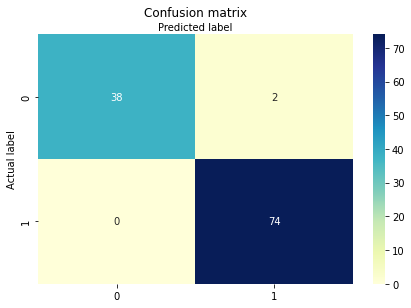

In [40]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 
plt.savefig("confusion_matrix.png", dpi = 360)

### Problem 4

In [51]:
# K FOLDS
X_std = sc.fit_transform(X)
K = 5
kfold = KFold(n_splits=K, shuffle=True)
model = LogisticRegression(penalty='l1', C=1, solver='liblinear', max_iter=1000)
results = cross_val_score(model, X_std, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 97.710% (2.204%)


In [52]:
# K FOLDS
X_std = sc.fit_transform(X)
K = 10
kfold = KFold(n_splits=K, shuffle=True)
model = LogisticRegression(penalty='l1', C=1, solver='liblinear', max_iter=1000)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 95.614% (2.386%)


In [54]:
model.fit(X_train_std, y_train)
print('Training Accuracy: ', model.score(X_train_std, y_train))
print('Testing Accuracy: ', model.score(X_test_std, y_test))

Training Accuracy:  0.9824175824175824
Testing Accuracy:  0.9824561403508771
